GRUPO:
HENNY ROCIO CARRILLO - hcarril42467@universidadean.edu.co
WILBER ALEXANDER RODRIGUEZ CASTRO - wrodrig96546@universidadean.edu.co

TEMA: Tarea de modelos de conteo [CountVectorizer] [TfidfVectorizer]


In [1]:
import re ## Exprexiones regulares
import nltk ## Procesamiento de lenguaje natural
from nltk.corpus import stopwords ## Palabras vacias
from nltk.stem import SnowballStemmer ## Stemming
from nltk.tokenize import word_tokenize ## Tokenizacion
from nltk.tokenize import RegexpTokenizer ## Tokenizacion
from sklearn.feature_extraction.text import CountVectorizer ## Vectorizador
import spacy ## Procesamiento de lenguaje natural
import pandas as pd


############## Descarga de recursos de nltk ################
nltk.download('punkt') ## Tokenizador
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

############## Es necesario descargar estos recursos para poder ejecutar el script ################


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# URL del archivo crudo desde GitHub
url = 'https://raw.githubusercontent.com/Izainea/nlp_ean/main/Datos/Datos%20Crudos/reviews_booking.csv'

# Cargar el archivo CSV en un DataFrame
Baseinicial_DF = pd.read_csv(url)

# Mostrar el DataFrame
Baseinicial_DF.head()

C:\Users\analistaderiesgo1\AppData\Local\Temp\ipykernel_32344\1439072273.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Baseinicial_DF = pd.read_csv(url)


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí


In [3]:
# Eliminar filas con valores NaN en la columna 'Calificación'
Baseinicial_DF = Baseinicial_DF.dropna(subset=['Calificación'])

# Verificar si la columna 'Calificación' ahora está limpia
print(Baseinicial_DF['Calificación'].isnull().sum())

# Crear una nueva columna para segmentar las calificaciones
def segmentar_calificacion(calificación):
    try:
        calificación = float(calificación)  # Convertir a número (float o int)
        if 0 <= calificación <= 7:
            return "Negativas"
        elif 8 <= calificación <= 10:
            return "Positivas"
        else:
            return "Desconocido"
    except ValueError:
        return "Desconocido"

# Aplicar la segmentación
Baseinicial_DF['Segmento_Calificación'] = Baseinicial_DF['Calificación'].apply(segmentar_calificacion)

# Mostrar el DataFrame con la nueva columna
print(Baseinicial_DF.head())

0
   Unnamed: 0       País Acomodación    Noches  Fecha hospedaje  \
0           0  Venezuela         NaN  2 noches    julio de 2023   
1           1   Colombia         NaN  4 noches  octubre de 2024   
2           2   Colombia         NaN   1 noche  octubre de 2024   
3           3   Colombia         NaN   1 noche   agosto de 2024   
4           4   Colombia         NaN  3 noches    marzo de 2024   

              Grupo viaje           Fecha reseña  \
0               En pareja    31 de julio de 2023   
1  Persona que viaja sola  23 de octubre de 2024   
2  Persona que viaja sola  15 de octubre de 2024   
3               En pareja   20 de agosto de 2024   
4               En pareja    27 de marzo de 2024   

                                    Titulo Calificación  \
0                              Excepcional           10   
1                               Fantástica           10   
2                              Excepcional           10   
3  Gran apartamento en una gran ubicación.    

In [4]:
Baseinicial_DF['Calificación']=Baseinicial_DF['Calificación'].str.replace(',','.').astype(float)

In [5]:
pip install langdetect


In [6]:
from langdetect import detect
import pandas as pd

# Función para detectar el idioma de un texto
def detectar_idioma(texto):
    try:
        # Detectar el idioma
        idioma = detect(texto)
        # Retornar 'Español' si el idioma es español, y 'Otro' si no lo es
        return 'Español' if idioma == 'es' else 'Otro'
    except:
        return 'Otro'  # En caso de error, retornamos 'Otro'

# Filtrar por calificaciones menores o iguales a 7
Baseinicial_DFN = Baseinicial_DF[Baseinicial_DF['Calificación'] <= 7]

# Seleccionar solo las columnas 'Cosas Negativas' y 'Calificación' para mantener contexto
Baseinicial_DFN = Baseinicial_DFN[['Cosas Negativas', 'Calificación']] 

# Filtrar textos con longitud mayor a 60 caracteres y manejar valores nulos
Baseinicial_DFN = Baseinicial_DFN[Baseinicial_DFN['Cosas Negativas'].fillna('').apply(len) > 60]

# Filtrar solo los textos que están en español usando la función detectar_idioma
Baseinicial_DFN['Idioma'] = Baseinicial_DFN['Cosas Negativas'].apply(detectar_idioma)

# Verificar si hay textos en otros idiomas y excluirlos
Baseinicial_DFN = Baseinicial_DFN[Baseinicial_DFN['Idioma'] == 'Español']

# Tomar una muestra aleatoria de 7500 registros
Baseinicial_DFN = Baseinicial_DFN.sample(7500, random_state=42)  # Añadir un random_state para reproducibilidad

# Añadir la columna 'Segmento_Calificación' con el valor 'Negativa'
Baseinicial_DFN['Segmento_Calificación'] = 'Negativa'

# Mostrar las primeras filas para verificar el resultado
print(Baseinicial_DFN.head())




                                          Cosas Negativas  Calificación  \
205938  Las camas matrimoniales de las habitaciones es...           7.0   
420499  las almohadas y sábanas estaban sucias, el pap...           5.0   
175681  el parqueadero mas cercano y segura queda a 8-...           7.0   
415848  Entre diario fenomenal pero en fin de semana c...           5.0   
434835  La ubicación es muy regular , la zona es pelig...           7.0   

         Idioma Segmento_Calificación  
205938  Español              Negativa  
420499  Español              Negativa  
175681  Español              Negativa  
415848  Español              Negativa  
434835  Español              Negativa  


In [7]:
Baseinicial_DFN

,Cosas Negativas,Calificación,Idioma,Segmento_Calificación
205938,Las camas matrimoniales de las habitaciones es...,7.0,Español,Negativa
420499,"las almohadas y sábanas estaban sucias, el pap...",5.0,Español,Negativa
175681,el parqueadero mas cercano y segura queda a 8-...,7.0,Español,Negativa
415848,Entre diario fenomenal pero en fin de semana c...,5.0,Español,Negativa
434835,"La ubicación es muy regular , la zona es pelig...",7.0,Español,Negativa
...,...,...,...,...
324006,Teniendo disponibilidad me la negaron inicialm...,7.0,Español,Negativa
72612,que me ofrecieron una habitación con cama dobl...,4.0,Español,Negativa
355989,Un problema inicial que hubo con la primera re...,6.0,Español,Negativa
128365,"Las habitaciones un poco viejas, falta arregla...",7.0,Español,Negativa


In [8]:
from langdetect import detect

# Función para detectar el idioma de un texto
def detectar_idioma(texto):
    try:
        # Detectar el idioma
        idioma = detect(texto)
        # Retornar 'Español' si el idioma es español, y 'Otro' si no lo es
        return 'Español' if idioma == 'es' else 'Otro'
    except Exception as e:
        print(f"Error detectando idioma: {e}")  # Mostrar el error si se produce
        return 'Otro'  # En caso de error, retornamos 'Otro'

# Filtrar por calificaciones entre 8 y 10
Baseinicial_DFP = Baseinicial_DF[(Baseinicial_DF['Calificación'] >= 8) & (Baseinicial_DF['Calificación'] <= 10)]

# Seleccionar solo la columna 'Cosas Positivas' y 'Calificación' para mantener contexto
Baseinicial_DFP = Baseinicial_DFP[['Cosas Positivas', 'Calificación']] 

# Filtrar textos con longitud mayor a 60 caracteres y manejar valores nulos
Baseinicial_DFP = Baseinicial_DFP[Baseinicial_DFP['Cosas Positivas'].fillna('').apply(len) > 60]

# Filtrar solo los textos que están en español utilizando la función detectar_idioma
Baseinicial_DFP['Idioma'] = Baseinicial_DFP['Cosas Positivas'].apply(detectar_idioma)

# Verificar si se han detectado correctamente los textos en español
Baseinicial_DFP = Baseinicial_DFP[Baseinicial_DFP['Idioma'] == 'Español']

# Tomar una muestra aleatoria de 7500 registros
Baseinicial_DFP = Baseinicial_DFP.sample(7500, random_state=42)  # Añadir un random_state para reproducibilidad

# Añadir la columna 'Segmento_Calificación' con el valor 'Positiva'
Baseinicial_DFP['Segmento_Calificación'] = 'Positiva'

# Mostrar las primeras filas para verificar el resultado
print(Baseinicial_DFP.head())

                                          Cosas Positivas  Calificación  \
416619  Un buen hotel. sin duda alguna volvería a usar...           9.0   
114731  Realmente fue mejor de lo que esperaba, la ubi...           9.0   
407008  La ubicacion - es un sector muy seguro rodeado...          10.0   
417619  ubicacion, lugares para trabajar, amabilidad d...           8.0   
76933   Instalaciones actas para personas con movilida...          10.0   

         Idioma Segmento_Calificación  
416619  Español              Positiva  
114731  Español              Positiva  
407008  Español              Positiva  
417619  Español              Positiva  
76933   Español              Positiva  


In [9]:
Baseinicial_DFP

,Cosas Positivas,Calificación,Idioma,Segmento_Calificación
416619,Un buen hotel. sin duda alguna volvería a usar...,9.0,Español,Positiva
114731,"Realmente fue mejor de lo que esperaba, la ubi...",9.0,Español,Positiva
407008,La ubicacion - es un sector muy seguro rodeado...,10.0,Español,Positiva
417619,"ubicacion, lugares para trabajar, amabilidad d...",8.0,Español,Positiva
76933,Instalaciones actas para personas con movilida...,10.0,Español,Positiva
...,...,...,...,...
352368,"La habitación está excelente, muy completa, co...",10.0,Español,Positiva
207555,"Encantada con todo, se siente como si estuvier...",10.0,Español,Positiva
355809,"la ubicación del hotel es perfecta, cerca al a...",8.0,Español,Positiva
270289,La comodidad de la cama y las comodidades que ...,10.0,Español,Positiva


In [34]:
# Renombrar las columnas para unificarlas bajo 'Comentarios'
Baseinicial_DFP.rename(columns={'Cosas Positivas': 'Comentarios'}, inplace=True)
Baseinicial_DFN.rename(columns={'Cosas Negativas': 'Comentarios'}, inplace=True)


In [35]:
# Añadir una columna para identificar si el comentario es positivo o negativo
Baseinicial_DFP['Segmento_Calificación'] = 'Positiva'
Baseinicial_DFN['Segmento_Calificación'] = 'Negativa'


In [42]:
# Añadir una columna 'Segmento_Calificación' para identificar los comentarios positivos y negativos
Baseinicial_DFP['Segmento_Calificación'] = 'Positiva'
Baseinicial_DFN['Segmento_Calificación'] = 'Negativa'

In [43]:
# Concatenar ambos DataFrames
Baseinicial_Consolidada = pd.concat([Baseinicial_DFP, Baseinicial_DFN], ignore_index=True)

In [44]:
# Verificar el resultado
print(Baseinicial_Consolidada.head())
print(f"Total de registros consolidados: {Baseinicial_Consolidada.shape[0]}")


   Calificación Segmento_Calificación  \
0           8.0              Positiva   
1          10.0              Positiva   
2           8.0              Positiva   
3          10.0              Positiva   
4          10.0              Positiva   

                                       Observaciones  
0  La cama estaba muy cómoda, buen tamaño y sufic...  
1  El alojamiento fue espectacular, todo muy orde...  
2  Muy buena ubicación y que hay gran variedad de...  
3  A equipe é muito solicita e atenciosa. Todo au...  
4  Muy limpia la habitación, la atención del pers...  
Total de registros consolidados: 15000


In [46]:
Baseinicial_Consolidada

,Calificación,Segmento_Calificación,Observaciones
0,8.0,Positiva,"La cama estaba muy cómoda, buen tamaño y sufic..."
1,10.0,Positiva,"El alojamiento fue espectacular, todo muy orde..."
2,8.0,Positiva,Muy buena ubicación y que hay gran variedad de...
3,10.0,Positiva,A equipe é muito solicita e atenciosa. Todo au...
4,10.0,Positiva,"Muy limpia la habitación, la atención del pers..."
...,...,...,...
14995,4.0,Negativa,Os quartos são desconfortáveis quase não tem n...
14996,5.0,Negativa,La persona que nos recibió no nos dio indicaci...
14997,7.0,Negativa,Sigo esperando mi facturación chefandresbastid...
14998,1.0,Negativa,1-Sofa en mal estado.\n2- La televisión no fun...


In [52]:
# Descarga necesaria para el tokenizador (corrección del nombre)
nltk.download('punkt')  

# Tokenización por palabras en la columna 'Baseinicial_Consolidado'
Baseinicial_Consolidada['Tokenizado'] = Baseinicial_Consolidada['Observaciones'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analistaderiesgo1\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


In [53]:

Baseinicial_Consolidada.head()

,Calificación,Segmento_Calificación,Observaciones,Tokenizado
0,8.0,Positiva,"La cama estaba muy cómoda, buen tamaño y sufic...","[La, cama, estaba, muy, cómoda, ,, buen, tamañ..."
1,10.0,Positiva,"El alojamiento fue espectacular, todo muy orde...","[El, alojamiento, fue, espectacular, ,, todo, ..."
2,8.0,Positiva,Muy buena ubicación y que hay gran variedad de...,"[Muy, buena, ubicación, y, que, hay, gran, var..."
3,10.0,Positiva,A equipe é muito solicita e atenciosa. Todo au...,"[A, equipe, é, muito, solicita, e, atenciosa, ..."
4,10.0,Positiva,"Muy limpia la habitación, la atención del pers...","[Muy, limpia, la, habitación, ,, la, atención,..."


In [54]:
print(Baseinicial_Consolidado.columns)


Index(['Observaciones', 'Calificación', 'Segmento_Calificación', 'Tokenizado'], dtype='object')


In [74]:
def clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convertir lista de tokens a una cadena
    # Normalización
    text = text.lower()
    # Limpieza con regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Stop words
    stopwords_esp = stopwords.words('spanish')
    tokens = [token for token in tokens if token not in stopwords_esp]
    # Lemmatización
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(' '.join(tokens))
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)




In [129]:
from sklearn.model_selection import train_test_split


In [134]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


In [136]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS  # Corrige la importación
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras vacías (stopwords)
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Verificar las columnas del DataFrame
print(Baseinicial_Consolidada.columns)

# Asegurarse de que la columna 'Segmento_Calificación' esté presente
if 'Segmento_Calificación' in Baseinicial_Consolidada.columns:
    # Aplicar la limpieza de texto
    Baseinicial_Consolidada['Comentario_Limpio'] = Baseinicial_Consolidada['Observaciones'].apply(clean_text)

    # Vectorización de los comentarios limpios
    count_vectorizer = CountVectorizer()
    X = count_vectorizer.fit_transform(Baseinicial_Consolidada['Comentario_Limpio'])

    # Etiquetas de sentimiento (Positivo vs. No positivo)
    y = Baseinicial_Consolidada['Segmento_Calificación'] == 'Positivo'

    # División de los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Clasificación utilizando RandomForest
    random_forest_classifier = RandomForestClassifier()
    random_forest_classifier.fit(X_train, y_train)

    # Predicciones
    y_pred = random_forest_classifier.predict(X_test)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
else:
    print("La columna 'Segmento_Calificación' no se encuentra en el DataFrame.")



Index(['Calificación', 'Segmento_Calificación', 'Observaciones', 'Tokenizado',
       'Comentario_Limpio'],
      dtype='object')
Accuracy: 1.0000


In [137]:
# Crear el vectorizador con n-gramas de 2 palabras
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Aplicar el vectorizador a las observaciones
vectores = count_vectorizer.fit_transform(Baseinicial_Consolidada['Observaciones'])

# Mostrar las primeras características del vectorizador (opcional)
print(count_vectorizer.get_feature_names_out()[:10])  # Muestra las primeras 10 características



['000 cop' '000 par' '000 pesos' '000 petitdjeuner' '000 privado'
 '0000 0000' '0000 pedar' '0000 uhr' '0030 and' '01 muito']


In [138]:
DF_count = pd.DataFrame.sparse.from_spmatrix(vectores, columns=count_vectorizer.get_feature_names_out())


In [139]:
# Mostrar los 30 n-gramas más frecuentes
top_30_ngrams = DF_count.sum(axis=0).sort_values(ascending=False).head(30)


In [140]:
print(top_30_ngrams)

personal amable         83.26285
atencin personal       73.072821
in the                 54.768134
excelente ubicacin     54.683784
the room               48.977869
and the                  46.8589
buen ubicacin          45.781529
the staff              42.515008
agua caliente          41.267946
personal atento        38.639201
bien ubicado           36.604113
excelente atencin      36.069586
the hotel              35.439428
ubicacin excelente     35.008627
buen atencin           33.671146
check in               32.768394
ubicacin buen          32.712992
was very                32.49909
to the                 32.338735
cerca aeropuerto       31.331712
of the                 30.873126
room was               30.322805
it was                 30.243194
buen desayuno          29.654894
amabilidad personal    28.119318
desayuno bueno         27.594973
cama cmoda             27.194844
él él                  26.911237
excelente servicio     26.646678
the location           26.509779
dtype: Spa

In [147]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Observaciones'
if Baseinicial_Consolidada['Observaciones'].isnull().sum() > 0:
    print("Hay valores nulos en 'Observaciones', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Observaciones'].fillna('', inplace=True)  # Rellenar los nulos

# Inspeccionar las primeras filas para asegurarnos de que 'Observaciones' tiene datos
print("Primeras observaciones originales:")
print(Baseinicial_Consolidada['Observaciones'].head())

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Observaciones'].apply(clean_text)

# Verificar las primeras observaciones después de la limpieza
print("Primeras observaciones después de la limpieza:")
print(Baseinicial_Consolidada[['Observaciones', 'Observaciones_Limpias']].head())

# Verificar la longitud de las observaciones limpias para asegurarnos de que no sean demasiado cortas
Baseinicial_Consolidada['Longitud_Observaciones_Limpias'] = Baseinicial_Consolidada['Observaciones_Limpias'].apply(lambda x: len(x.split()))
print("Longitud de las observaciones después de la limpieza:")
print(Baseinicial_Consolidada[['Observaciones_Limpias', 'Longitud_Observaciones_Limpias']].head())

# Ver si alguna observación tiene longitud 0 después de la limpieza
if (Baseinicial_Consolidada['Longitud_Observaciones_Limpias'] == 0).sum() > 0:
    print("Existen observaciones limpias vacías, revisa la limpieza.")
    print(Baseinicial_Consolidada[Baseinicial_Consolidada['Longitud_Observaciones_Limpias'] == 0])

# Ahora, aplicamos el CountVectorizer con ajustes más flexibles
vectorizador_Base_Consolidada = CountVectorizer(stop_words=None, max_features=1000)  # Limitar el número de características a 1000

# Ajustar el vectorizador a los textos limpios
vectorizador_Base_Consolidada.fit(Baseinicial_Consolidada['Observaciones_Limpias'])

# Ver qué características (palabras) ha extraído el vectorizador
print("Características extraídas por CountVectorizer:")
print(vectorizador_Base_Consolidada.get_feature_names_out()[:20])  # Mostrar solo las primeras 20

# Transformar el texto en una matriz de características
salida = vectorizador_Base_Consolidada.transform(Baseinicial_Consolidada['Observaciones_Limpias'])

# Convertir la salida a un DataFrame para verlo de forma más clara
df_salidas = pd.DataFrame(salida.toarray(), columns=vectorizador_Base_Consolidada.get_feature_names_out())

# Mostrar las primeras filas de la salida
print("Matriz de características transformadas:")
print(df_salidas.head())  # Ver las primeras filas de la salida

# Verificar si todas las columnas tienen ceros
if df_salidas.sum().sum() == 0:
    print("La matriz de características tiene solo ceros, revisa la limpieza o el vectorizador.")


Primeras observaciones originales:
0    cama cmoda buen tamao suficiente cobija fro ci...
1    alojamiento espectacular ordenado limpio adema...
2      buen ubicacin gran variedad restaurante rededor
3    equipir muito solicitar atenciós auxlio precis...
4    limpio habitacin atencin personal buen servici...
Name: Observaciones, dtype: object
Primeras observaciones después de la limpieza:
                                       Observaciones  \
0  cama cmoda buen tamao suficiente cobija fro ci...   
1  alojamiento espectacular ordenado limpio adema...   
2    buen ubicacin gran variedad restaurante rededor   
3  equipir muito solicitar atenciós auxlio precis...   
4  limpio habitacin atencin personal buen servici...   

                               Observaciones_Limpias  
0  cama cmoda buen tamao suficiente cobija fro ci...  
1  alojamiento espectacular ordenado limpio adema...  
2    buen ubicacin gran variedad restaurante rededor  
3  equipir muito solicitar atenciós auxlio precis..

Resultados de PCA (primeras filas):
   Componente_1  Componente_2
0     -0.345177     -0.327501
1     -0.485778     -0.107613
2     -0.409562     -0.290359
3      0.029409     -0.238405
4      0.420481     -0.967606


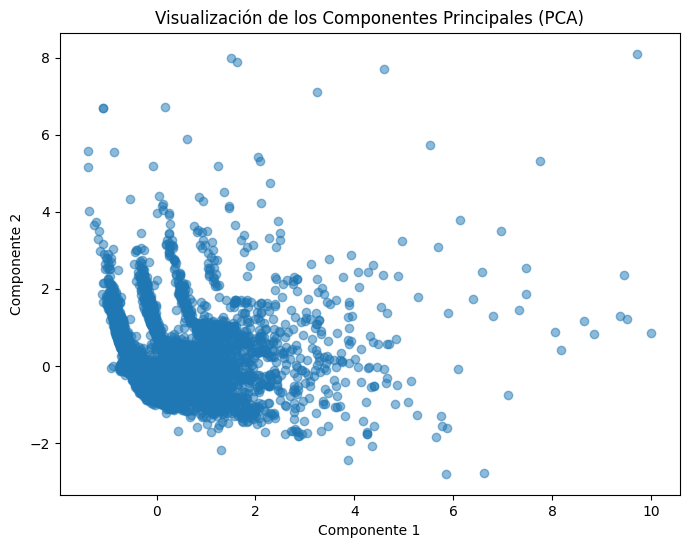

In [148]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import string

# Función de limpieza de texto simple
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    # Eliminar palabras de longitud 1, 2, para evitar eliminar palabras útiles
    text = ' '.join([word for word in text.split() if len(word) > 2])  # Evitar eliminar palabras útiles
    return text

# Verifica si hay valores nulos o vacíos en la columna 'Observaciones'
if Baseinicial_Consolidada['Observaciones'].isnull().sum() > 0:
    print("Hay valores nulos en 'Observaciones', se eliminarán o reemplazarán.")
    Baseinicial_Consolidada['Observaciones'].fillna('', inplace=True)  # Rellenar los nulos

# Aplicar la función de limpieza a la columna de texto
Baseinicial_Consolidada['Observaciones_Limpias'] = Baseinicial_Consolidada['Observaciones'].apply(clean_text)

# Aplicar el CountVectorizer para extraer las características de texto
vectorizador_Base_Consolidada = CountVectorizer(stop_words=None, max_features=1000)  # Limitar el número de características a 1000

# Ajustar el vectorizador a los textos limpios
vectorizador_Base_Consolidada.fit(Baseinicial_Consolidada['Observaciones_Limpias'])

# Transformar el texto en una matriz de características
salida = vectorizador_Base_Consolidada.transform(Baseinicial_Consolidada['Observaciones_Limpias'])

# Convertir la salida a un DataFrame para verlo de forma más clara
df_salidas = pd.DataFrame(salida.toarray(), columns=vectorizador_Base_Consolidada.get_feature_names_out())

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
pca_resultado = pca.fit_transform(df_salidas)

# Convertir el resultado de PCA en un DataFrame para una mejor visualización
df_pca = pd.DataFrame(pca_resultado, columns=['Componente_1', 'Componente_2'])

# Mostrar los resultados de PCA
print("Resultados de PCA (primeras filas):")
print(df_pca.head())

# Opcional: Visualizar los componentes principales en un gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Componente_1'], df_pca['Componente_2'], alpha=0.5)
plt.title("Visualización de los Componentes Principales (PCA)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()
